In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 12

In [ ]:
#load uci heart disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

heart_data = pd.read_csv(url, names=column_names, na_values='?')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [ ]:
#check for missing data
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#replace null values per median
heart_data.fillna(heart_data.median(), inplace=True)

In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#show statiscts parms(mean var, q1)
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#simple data visiualisation

In [ ]:
heart_data['target'] = heart_data['target'].apply(lambda x: 0 if x == 0 else 1)
heart_data['sex'] = heart_data['sex'].map({0: 'female', 1: 'male'})

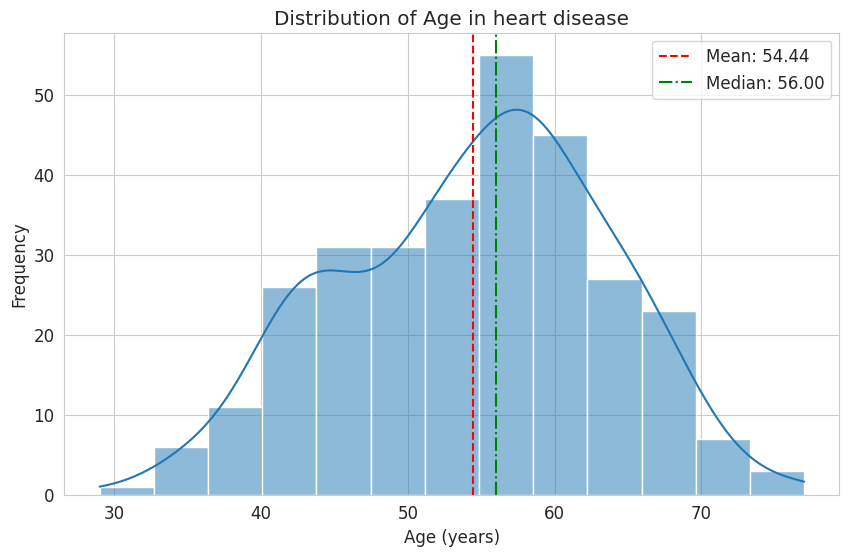

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['age'], kde=True)
plt.title('Distribution of Age in heart disease')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.axvline(heart_data['age'].mean(), color='r', linestyle='--', label=f'Mean: {heart_data["age"].mean():.2f}')
plt.axvline(heart_data['age'].median(), color='g', linestyle='-.',
            label=f'Median: {heart_data["age"].median():.2f}')
plt.legend()
plt.show()

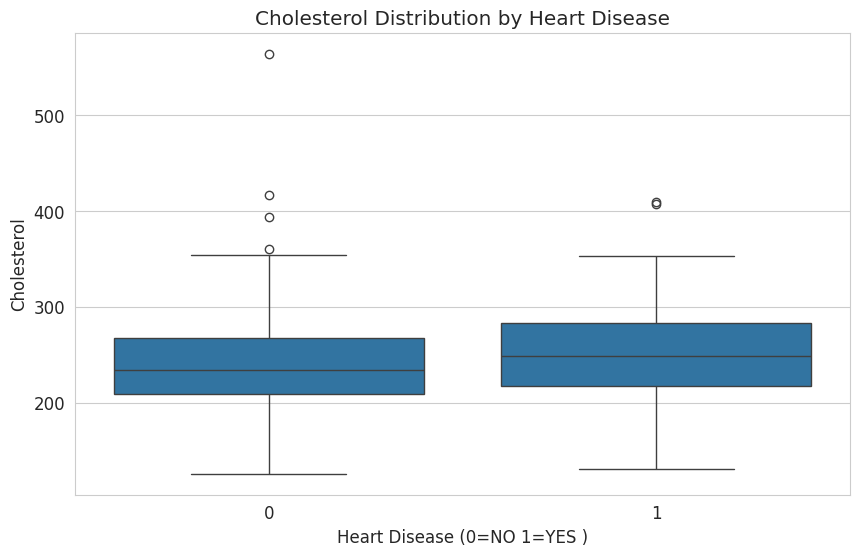

In [ ]:
#box plot for cholesterol
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=heart_data)
plt.title('Cholesterol Distribution by Heart Disease')
plt.xlabel('Heart Disease (0=NO 1=YES )')
plt.ylabel('Cholesterol')
plt.show()

Text(0, 0.5, 'Count')

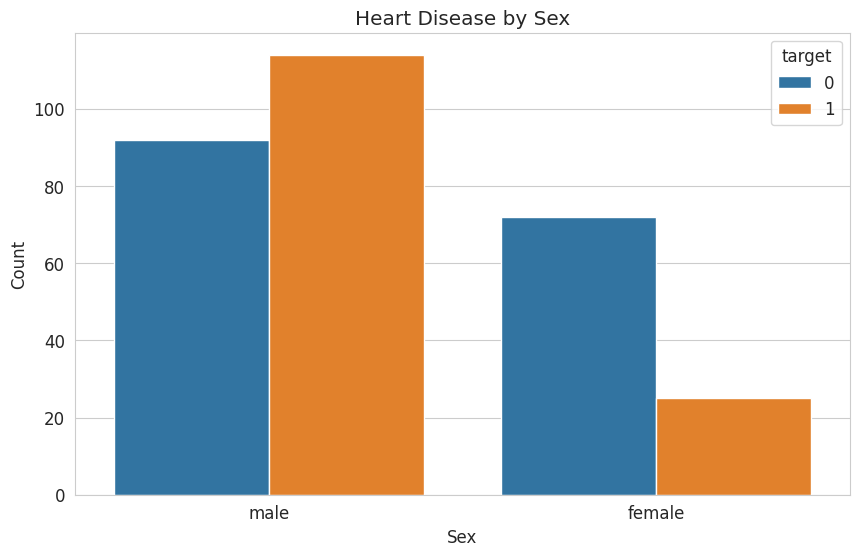

In [ ]:
#comparing male and female heart disiease
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=heart_data)
plt.title('Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

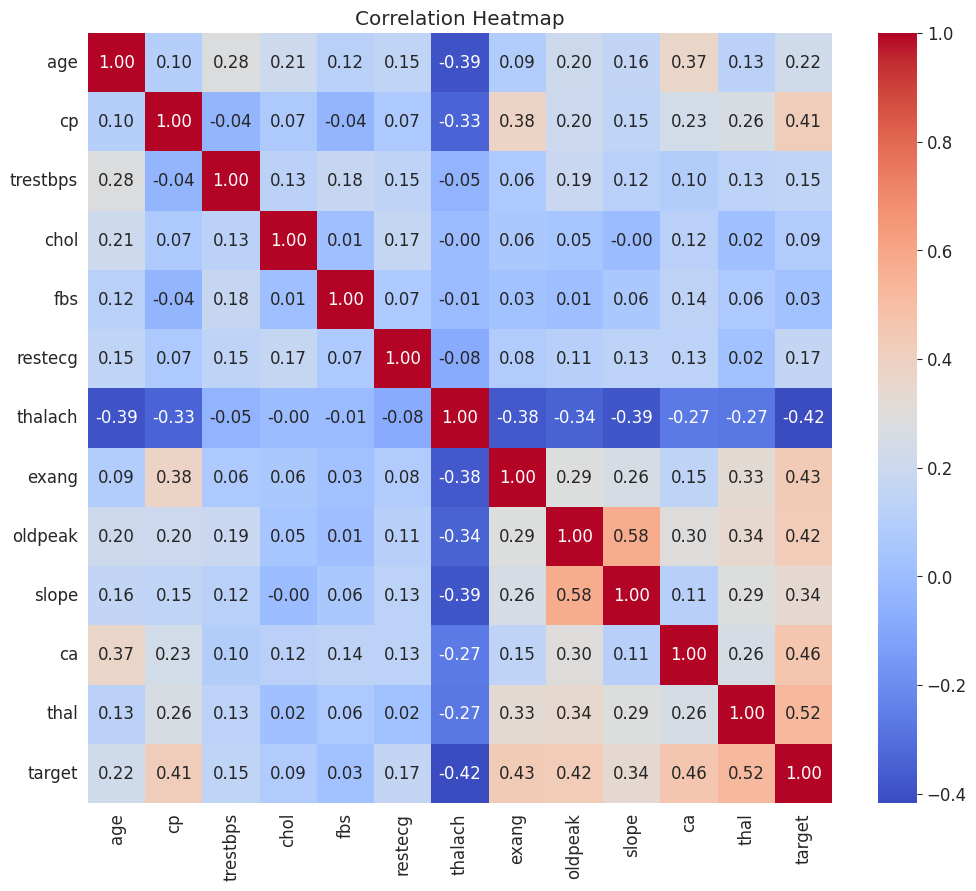

In [ ]:
#correlation heatmap
plt.figure(figsize=(12, 10))
numerical_cols= heart_data.select_dtypes(include=['float64','int64']).columns
correlation_matrix = heart_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()